In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [6]:
trials = 1E4
file1 = open('results_frequency_IC86+Gen2_{:.0E}_trials.pkl'.format(trials), 'rb')
data1 = pickle.load(file1)
file2 = open('results_frequency_IC86+Gen2+WLS_{:.0E}_trials.pkl'.format(trials), 'rb')
data2 = pickle.load(file2)

cut_freq = 75 * u.Hz
distances1, Sm1_gen2, Sm1_ic86, Bm1_gen2, Bm1_ic86, Z1_gen2, Z1_ic86 = data1
distances2, Sm2_gen2, Sm2_ic86, Bm2_gen2, Bm2_ic86, Z2_gen2, Z2_ic86 = data2

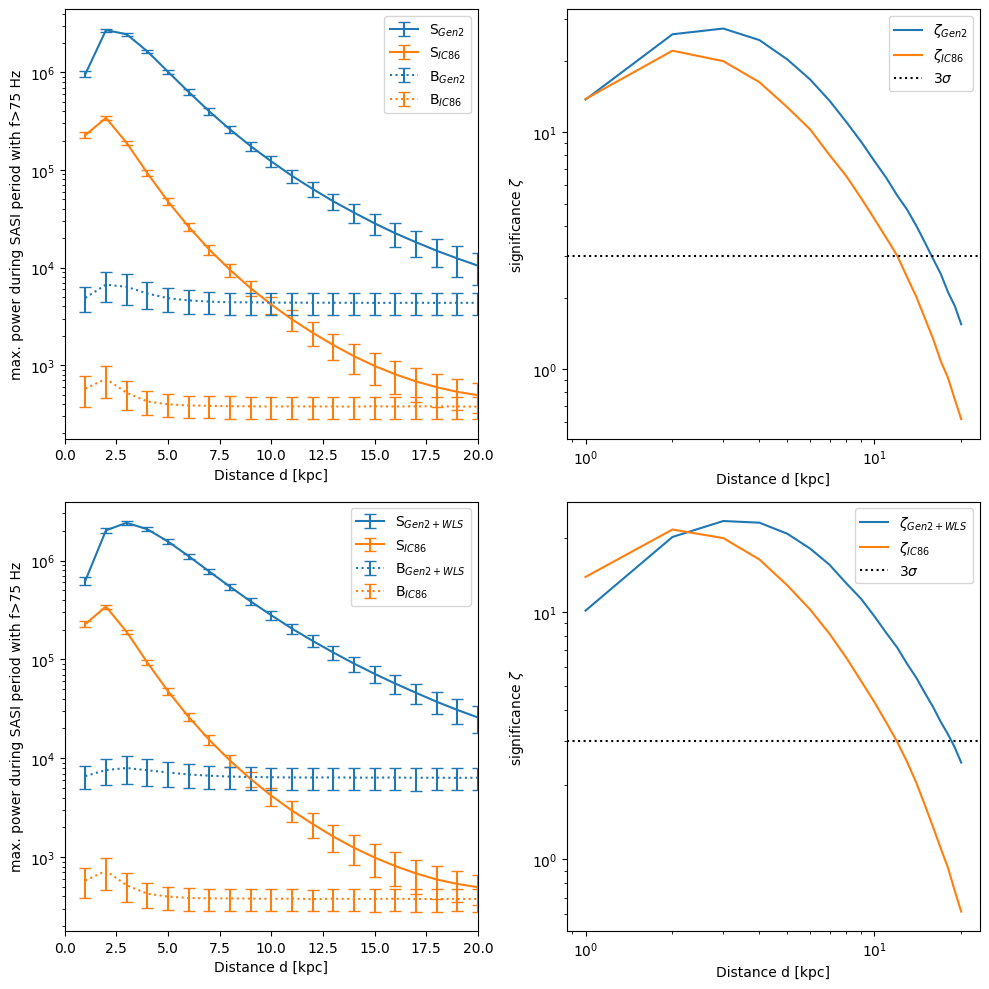

In [8]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax = ax.ravel()

ax[0].errorbar(x=distances1, y=Sm1_gen2.T[0],yerr=Sm1_gen2.T[1], capsize=4, color = 'C0', label=r'S$_{Gen2}$')
ax[0].errorbar(x=distances1, y=Sm1_ic86.T[0],yerr=Sm1_ic86.T[1], capsize=4, color = 'C1', label=r'S$_{IC86}$')
ax[0].errorbar(x=distances1, y=Bm1_gen2.T[0],yerr=Bm1_gen2.T[1], capsize=4, color = 'C0', ls = ':', label=r'B$_{Gen2}$')
ax[0].errorbar(x=distances1, y=Bm1_ic86.T[0],yerr=Bm1_ic86.T[1], capsize=4, color = 'C1', ls = ':', label=r'B$_{IC86}$')
ax[0].set_xlabel('Distance d [kpc]')
ax[0].set_ylabel('max. power during SASI period with f>{:.0f}'.format(cut_freq))
ax[0].set_xlim((0,20))
ax[0].set_yscale('log')
ax[0].legend()

ax[1].plot(distances1, Z1_gen2, color = 'C0', label=r'$\zeta_{Gen2}$')
ax[1].plot(distances1, Z1_ic86, color = 'C1', label=r'$\zeta_{IC86}$')
ax[1].axhline(3, color='k', ls = ':', label = '3$\sigma$')
ax[1].set_xlabel('Distance d [kpc]')
ax[1].set_ylabel('significance $\zeta$')
#ax[1].set_xlim((0,20))
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].legend()

ax[2].errorbar(x=distances1, y=Sm2_gen2.T[0],yerr=Sm2_gen2.T[1], capsize=4, color = 'C0', label=r'S$_{Gen2+WLS}$')
ax[2].errorbar(x=distances1, y=Sm2_ic86.T[0],yerr=Sm2_ic86.T[1], capsize=4, color = 'C1', label=r'S$_{IC86}$')
ax[2].errorbar(x=distances1, y=Bm2_gen2.T[0],yerr=Bm2_gen2.T[1], capsize=4, color = 'C0', ls = ':', label=r'B$_{Gen2+WLS}$')
ax[2].errorbar(x=distances1, y=Bm2_ic86.T[0],yerr=Bm2_ic86.T[1], capsize=4, color = 'C1', ls = ':', label=r'B$_{IC86}$')
ax[2].set_xlabel('Distance d [kpc]')
ax[2].set_ylabel('max. power during SASI period with f>{:.0f}'.format(cut_freq))
ax[2].set_xlim((0,20))
ax[2].set_yscale('log')
ax[2].legend()

ax[3].plot(distances1, Z2_gen2, color = 'C0', label=r'$\zeta_{Gen2+WLS}$')
ax[3].plot(distances1, Z2_ic86, color = 'C1', label=r'$\zeta_{IC86}$')
ax[3].axhline(3, color='k', ls = ':', label = '3$\sigma$')
ax[3].set_xlabel('Distance d [kpc]')
ax[3].set_ylabel('significance $\zeta$')
#ax[1].set_xlim((0,20))
ax[3].set_xscale('log')
ax[3].set_yscale('log')
ax[3].legend()

plt.tight_layout()

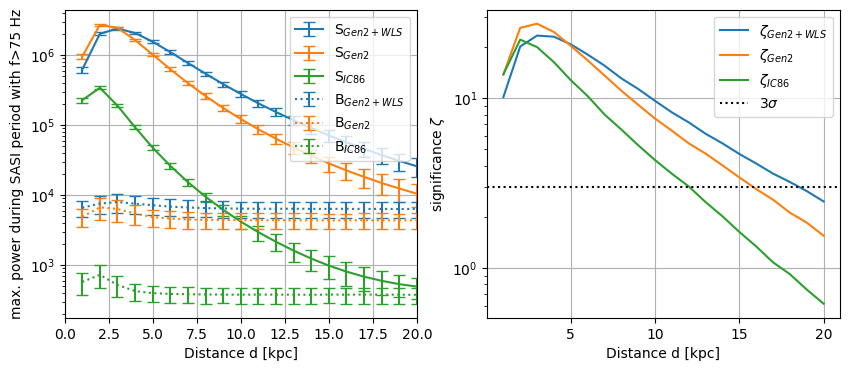

In [12]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
ax = ax.ravel()

ax[0].errorbar(x=distances2, y=Sm2_gen2.T[0],yerr=Sm2_gen2.T[1], capsize=4, color = 'C0', label=r'S$_{Gen2+WLS}$')
ax[0].errorbar(x=distances1, y=Sm1_gen2.T[0],yerr=Sm1_gen2.T[1], capsize=4, color = 'C1', label=r'S$_{Gen2}$')
ax[0].errorbar(x=distances1, y=Sm1_ic86.T[0],yerr=Sm1_ic86.T[1], capsize=4, color = 'C2', label=r'S$_{IC86}$')
ax[0].errorbar(x=distances2, y=Bm2_gen2.T[0],yerr=Bm2_gen2.T[1], capsize=4, color = 'C0', ls = ':', label=r'B$_{Gen2+WLS}$')
ax[0].errorbar(x=distances1, y=Bm1_gen2.T[0],yerr=Bm1_gen2.T[1], capsize=4, color = 'C1', ls = ':', label=r'B$_{Gen2}$')
ax[0].errorbar(x=distances1, y=Bm1_ic86.T[0],yerr=Bm1_ic86.T[1], capsize=4, color = 'C2', ls = ':', label=r'B$_{IC86}$')
ax[0].set_xlabel('Distance d [kpc]')
ax[0].set_ylabel('max. power during SASI period with f>{:.0f}'.format(cut_freq))
ax[0].set_xlim((0,20))
ax[0].set_yscale('log')
ax[0].legend()
ax[0].grid()

ax[1].plot(distances1, Z2_gen2, color = 'C0', label=r'$\zeta_{Gen2+WLS}$')
ax[1].plot(distances1, Z1_gen2, color = 'C1', label=r'$\zeta_{Gen2}$')
ax[1].plot(distances1, Z1_ic86, color = 'C2', label=r'$\zeta_{IC86}$')
ax[1].axhline(3, color='k', ls = ':', label = '3$\sigma$')
ax[1].set_xlabel('Distance d [kpc]')
ax[1].set_ylabel('significance $\zeta$')
#ax[1].set_xlim((0,20))
#ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].legend()
ax[1].grid()
